In [1]:
from briefcase.case import Case
from briefcase.case_base import CaseBase
from briefcase.enums import incons_enum
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import TelcoConverter as TC
import random

historic_splits = [0.25, 0.5, 0.75, 0.95]

def test_constrainted_inconsistency(data_splits, constraint="ALL"):
    historic = data_splits['historic']
    new = data_splits['new']
    
    historic_cases = [Case.from_dict(c) for c in historic]
    cb = CaseBase(historic_cases)
    
    admitted = 0
    for item in new:
        new_case = Case.from_dict(item)
        # test without adding to case base
        if cb.order.admissibility_constraints.is_case_admissible(new_case.reason, new_case.defeated(), constraint):
            admitted += 1
            
    print(f"Number of cases admitted: {admitted}")
    size, inconsistencies = cb.metrics()
    return admitted, size, inconsistencies

def split_data(data):
    data_splits = {}
    for historic_split in historic_splits:
        historic = random.sample(data, k=int(historic_split * len(data)))
        # take 40 samples because max samples when 95% is 45
        new = random.sample(data, k=40)
        data_splits[historic_split] = {'historic': historic, 'new': new}
    return data_splits


importing Jupyter notebook from TelcoConverter.ipynb
Number of factors by type:
PI factors: 10 - ['PaperlessBilling', 'InternetService_Fiber optic', 'OnlineSecurity_False', 'OnlineBackup_False', 'DeviceProtection_False', 'TechSupport_False', 'StreamingTV_False', 'StreamingMovies_False', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']
Delta factors: 10 - ['Partner', 'Dependents', 'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_True', 'TechSupport_True', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)']
UN factors: 11 - ['PhoneService', 'gender_Female', 'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineBackup_True', 'DeviceProtection_True', 'StreamingTV_True', 'StreamingMovies_True', 'PaymentMethod_Mailed check']


## Admissibility experiments 
1. Split the data into a set of historic cases, and new cases 
2. Add each 

In [9]:
# Define the number of repetitions
repetitions = 100

# Initialize results list
results = []

# Repeat the experiment
for _ in range(repetitions):
    # Split the data
    data = TC.get_existing_test_data()
    data_splits = split_data(data)
    
    for historic_split in historic_splits:
        for constraint in [incons_enum.NO, incons_enum.NO_NEW, incons_enum.NO_INVOLVEMENT, 
                           incons_enum.HORTY, incons_enum.NO_CORRUPTION, incons_enum.ALL]:
            print(f"\nHistoric Split: {historic_split}")
            print(f"Constraint: {constraint.name}")
            
            # Run the experiment
            admitted, cases_size, tainted_cases = test_constrainted_inconsistency(data_splits[historic_split], constraint=constraint)
            
            # Store the results
            results.append({'Historic Split': historic_split, 
                            'Constraint': constraint.name, 
                            'No. cases admitted': admitted,
                            "No. cases": cases_size,
                            "No. inconsistent cases": tainted_cases,
                            "No. total cases for admission": len(data_splits[historic_split]['new'])})

# Convert results to DataFrame for easier manipulation
results_df = pd.DataFrame(results)

# Group by Historic Split and Constraint, calculate the average
average_results = results_df.groupby(['Historic Split', 'Constraint']).mean().reset_index()

Loaded data successfully from 'data/telco-corr-test-0.25.yaml'

Historic Split: 0.25
Constraint: NO
Number of cases admitted: 0
Number of cases:  344
Number of cases associated with inconsistency:  194
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10

Historic Split: 0.25
Constraint: NO_NEW
Number of cases admitted: 33
Number of cases:  344
Number of cases associated with inconsistency:  194
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10

Historic Split: 0.25
Constraint: NO_INVOLVEMENT
Number of cases admitted: 23
Number of cases:  344
Number of cases associated with inconsistency:  194
Maximum number of edges on a pi case: 523776
Maximum number of edges on a delta case: 523776
Factors for pi: 10
Factors for delta: 10

Historic Split: 0.25
Constraint: HORTY
Number of cases admitted: 40
Number of cases:  344
Number of

In [10]:
average_results

,Historic Split,Constraint,No. cases admitted,No. cases,No. inconsistent cases,No. total cases for admission
0,0.25,ALL,40.00,353.90,165.24,40.0
1,0.25,HORTY,37.53,353.90,165.24,40.0
2,0.25,NO,0.00,353.90,165.24,40.0
3,0.25,NO_CORRUPTION,38.98,353.90,165.24,40.0
4,0.25,NO_INVOLVEMENT,25.21,353.90,165.24,40.0
5,0.25,NO_NEW,29.39,353.90,165.24,40.0
6,0.50,ALL,40.00,705.49,403.67,40.0
7,0.50,HORTY,38.76,705.49,403.67,40.0
8,0.50,NO,0.00,705.49,403.67,40.0
9,0.50,NO_CORRUPTION,39.38,705.49,403.67,40.0


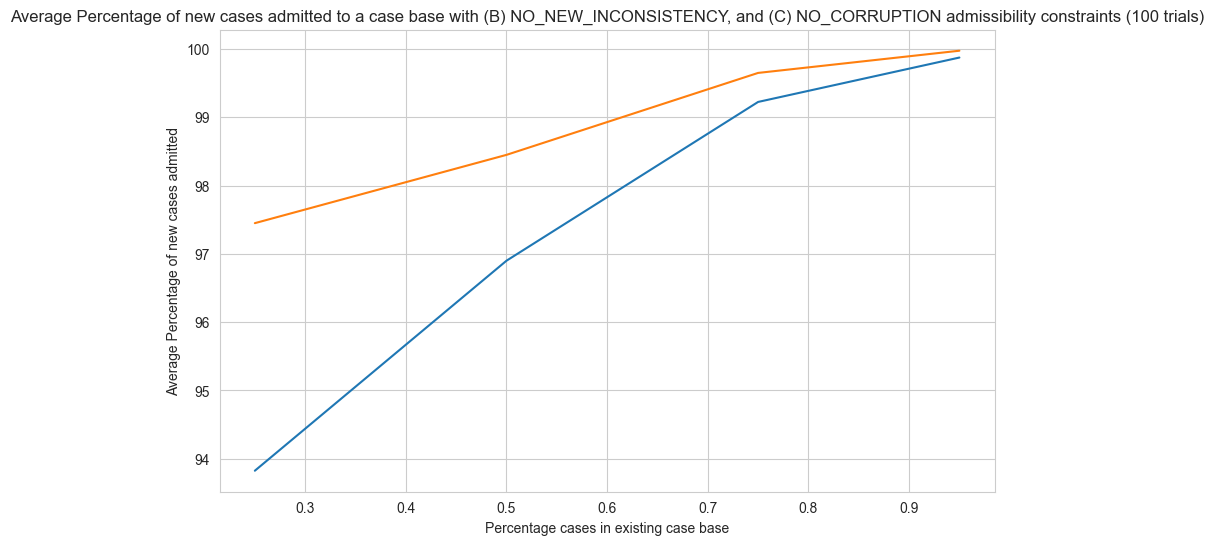

In [18]:
# Calculate the percentage of new cases admitted
average_results['Percentage new cases admitted'] = average_results['No. cases admitted'] / average_results['No. total cases for admission'] * 100

average_results['Constraint'] = average_results['Constraint'].replace('HORTY', 'NO_NEW+NO_INVOLVEMENT')


# Filter DataFrame for the constraints (B) and (C)
filtered_df = average_results[average_results['Constraint'].isin(['NO_NEW+NO_INVOLVEMENT', 'NO_CORRUPTION'])]

# Plotting
plt.figure(figsize=(10, 6))

for constraint in filtered_df['Constraint'].unique():
    sub_df = filtered_df[filtered_df['Constraint'] == constraint]
    plt.plot(sub_df['Historic Split'], sub_df['Percentage new cases admitted'], label=constraint)

plt.title(f"Average Percentage of new cases admitted to a case base with (B) NO_NEW_INCONSISTENCY, and (C) NO_CORRUPTION admissibility constraints ({repetitions} trials)")
plt.xlabel("Percentage cases in existing case base")
plt.ylabel("Average Percentage of new cases admitted")
plt.grid(True)
plt.show()

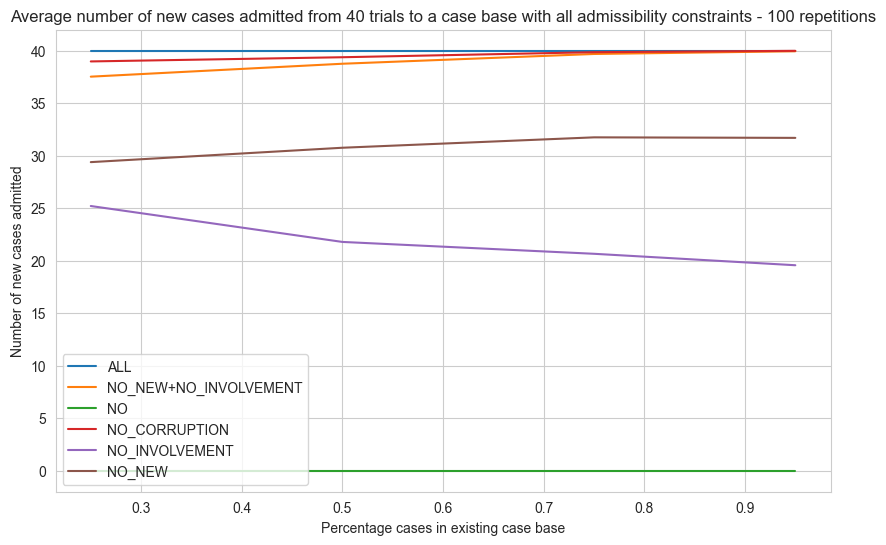

In [21]:
# Plotting
plt.figure(figsize=(10, 6))

for constraint in average_results['Constraint'].unique():
    sub_df = average_results[average_results['Constraint'] == constraint]
    plt.plot(sub_df['Historic Split'], sub_df['No. cases admitted'], label=constraint)

plt.title(f"Average number of new cases admitted from 40 trials to a case base with all admissibility constraints - {repetitions} repetitions")
plt.xlabel("Percentage cases in existing case base")
plt.ylabel("Number of new cases admitted")
plt.legend()
plt.grid(True)
plt.show()